## Decision Trees 
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

[Sklearn documentation user Guide](https://scikit-learn.org/stable/modules/tree.html)

[**sklearn decision tree classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[**Decision Trees Analyticsvidhya**](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/)

[Complete guide for Tree algorithm analyticsvidhya](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

Pruning is a technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

There are two main types of pruning in decision tree algorithms: pre-pruning and post-pruning.

1. **Pre-pruning (Early stopping)**: The decision tree is pruned by stopping the creation of the tree early. This can be done in several ways:
   - Setting a minimum number of training instances that must fall in each leaf.
   - Setting a maximum depth for the tree.
   - Setting a minimum gain in the impurity measure that must be achieved by each split.

2. **Post-pruning (Cost complexity pruning)**: The decision tree is first built to its fullest extent. Then, the non-important nodes are pruned from the bottom-up based on the error rate of the subtree rooted at that node. If pruning a node does not significantly increase its error rate, it is pruned. This is also known as weakest link pruning.

Both methods are used to prevent overfitting, which happens when the tree is too complex and tries to perfectly fit all samples in the training data, thus performing poorly on unseen data. Pre-pruning is faster, but might be too short-sighted since it doesn't consider future splits that might be beneficial. Post-pruning takes longer, but might result in a more accurate model since it considers the entire tree.

To implement pre-pruning and post-pruning in Python, you can use the DecisionTreeClassifier from scikit-learn. Here's a basic example:

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pre-pruning: create a decision tree with a maximum depth of 3
clf_pre = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pre.fit(X_train, y_train)

# Post-pruning (also known as cost complexity pruning in scikit-learn)
clf_post = DecisionTreeClassifier(ccp_alpha=0.015, random_state=42)
clf_post.fit(X_train, y_train)

# Now you can compare the performance of the pre-pruned and post-pruned trees
print("Pre-pruned tree score: ", clf_pre.score(X_test, y_test))
print("Post-pruned tree score: ", clf_post.score(X_test, y_test))
```

In this code, `max_depth=3` is used for pre-pruning, which limits the maximum depth of the tree to prevent overfitting. For post-pruning, `ccp_alpha=0.015` is used, which is a complexity parameter used for Minimal Cost-Complexity Pruning. The smaller ccp_alpha, the more nodes are pruned.

Please note that the optimal values for `max_depth` and `ccp_alpha` depend on your specific dataset and should be tuned using cross-validation or a separate validation set.

## Decision Tree Classifier Implementation With Post Prunning And Preprunning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
df = sns.load_dataset('iris')

In [6]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})



In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]  # Change -1 to the correct column name or index


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The `criterion` parameter in decision tree algorithms (like `DecisionTreeClassifier` or `DecisionTreeRegressor` in scikit-learn) determines the function to measure the quality of a split.

Here's what each of these options means:

1. **gini**: This is the Gini impurity, a measure of misclassification, which applies to categorical targets. A Gini impurity of 0 represents the best possible purity, i.e., all instances in a node belong to the same class.

2. **entropy**: This is the entropy, another measure of impurity, based on information theory. Entropy is 0 if all samples at a node belong to the same class, and maximum if the samples are evenly distributed across all classes. It tends to produce slightly more balanced trees than 'gini'.

3. **log_loss**: This is the logarithm of the likelihood function, used for probabilistic classification. It's used in models like logistic regression, but is not a valid criterion for decision trees in scikit-learn.

The default criterion is "gini", but you can choose "entropy" if you prefer. The best choice can depend on your data and the specific problem you're trying to solve. You might want to experiment with both and see which one gives better results for your use case.

Note: As of the current version of scikit-learn (0.24.2), "log_loss" is not a valid criterion for `DecisionTreeClassifier` or `DecisionTreeRegressor`.

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

In [13]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'petal_width <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]\nclass = versicolor'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.5555555555555556, 0.7857142857142857, 'petal_width <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(0.3333333333333333, 0.6428571428571429, 'petal_length <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(0.2222222222222222, 0.5, 'petal_width <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]\nclass = versicolor'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.35714285714285715, 'sepal_width <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]\nclass = versicolor'),
 Text(0.2222222222222222, 0.21428571428571427, 'sepal_length <= 6.15\nentropy

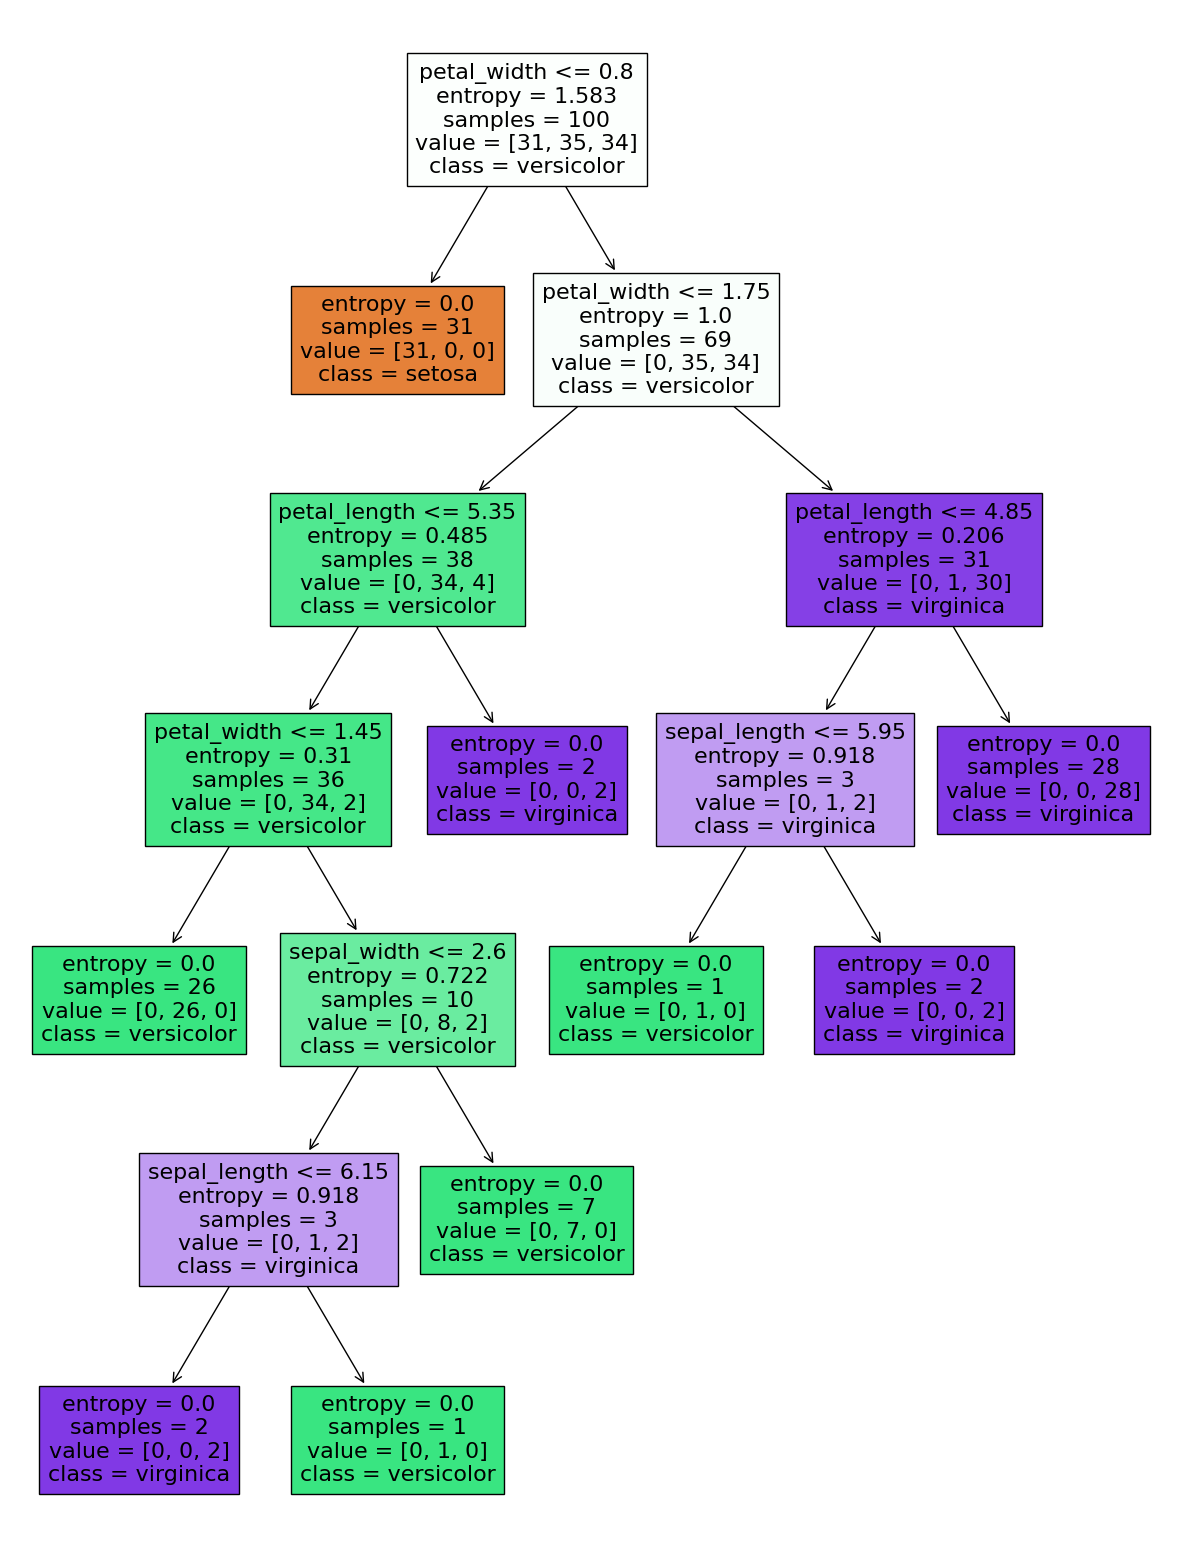

In [14]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(classifier, filled=True, feature_names=df.columns, class_names=dataset.target_names)

In [15]:
## Post Prunning 
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

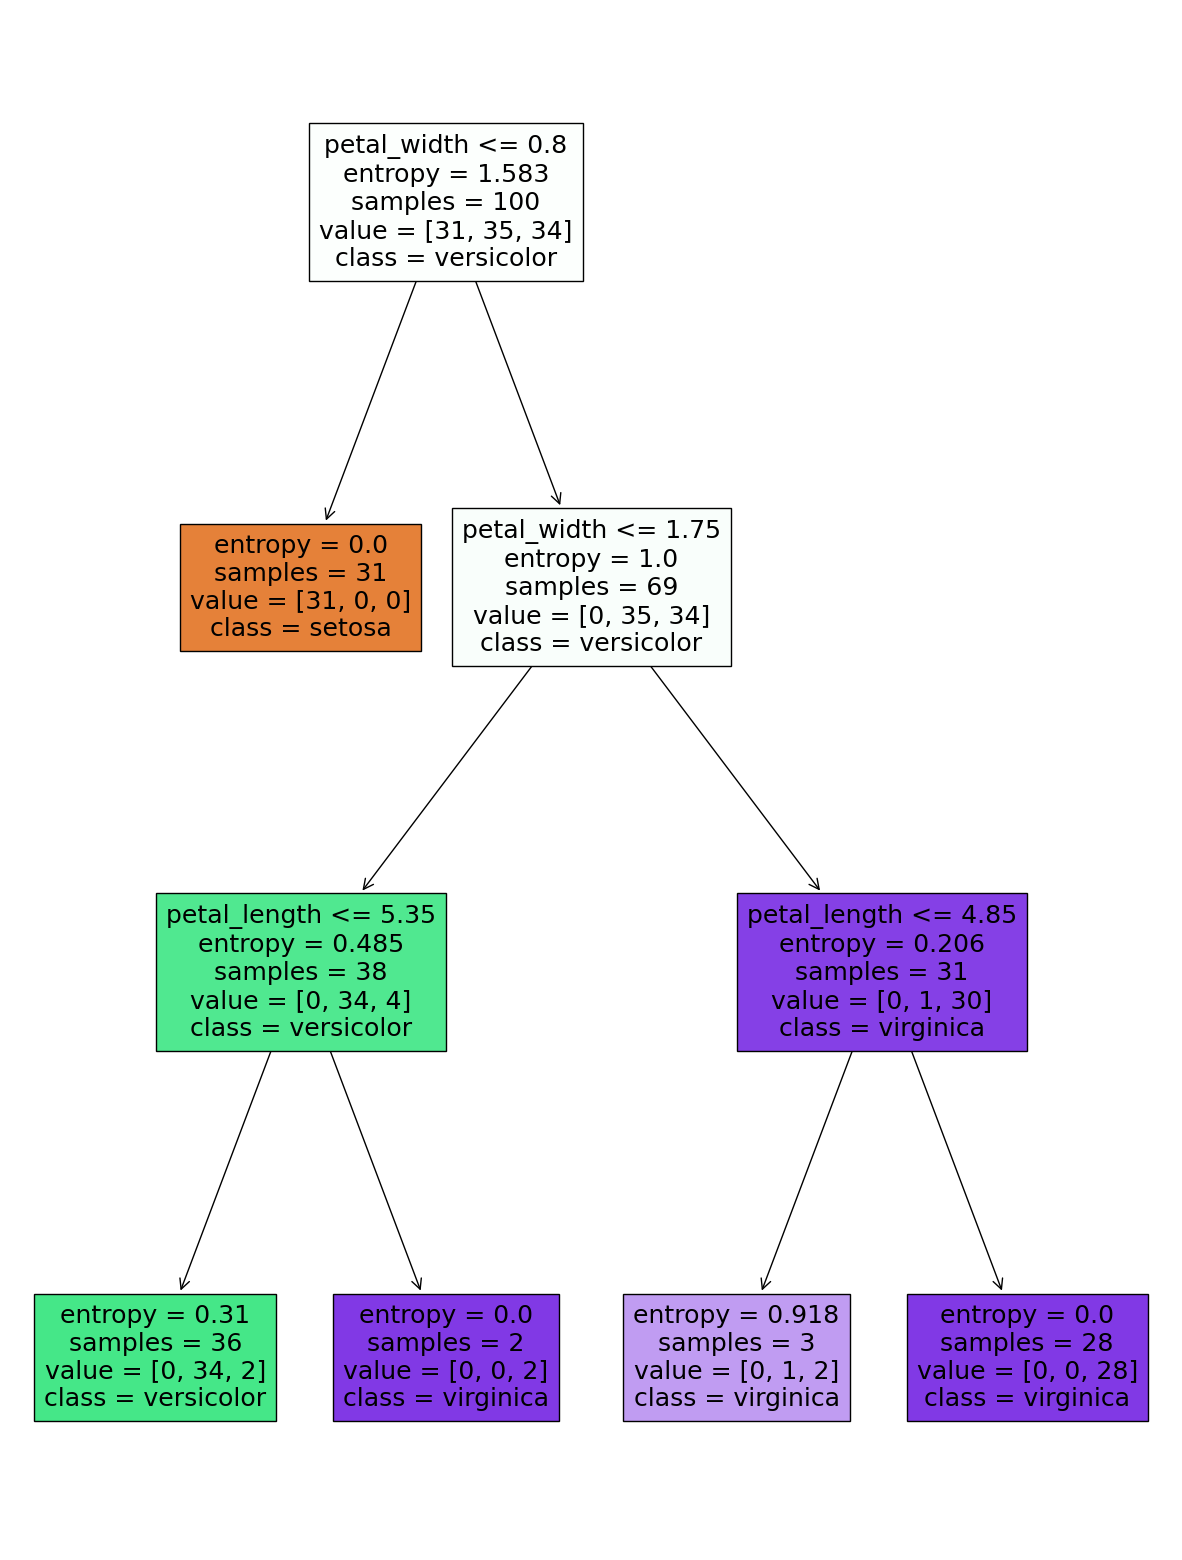

In [16]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(classifier, filled=True, feature_names=df.columns, class_names=dataset.target_names)
plt.show()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [20]:
import warnings 
warnings.filterwarnings('ignore')


In [21]:
from sklearn.model_selection import KFold

In [22]:

parameters = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'splitter': ['best'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt', 'log2'],
}

best_score = {}

for i in range(1,10):
    from sklearn.model_selection import GridSearchCV
    classifier = DecisionTreeClassifier()
    clf = GridSearchCV(classifier, param_grid=parameters, cv=5,scoring='accuracy')
    clf.fit(X_train, y_train)
    clf.best_params_
    y_pred = clf.predict(X_test)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred)
    print(score)
    best_score.update({score: clf.best_params_})


0.98
0.98
0.98
0.98
0.98
0.96
0.98
0.98
0.98


In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_test, y_pred))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

